In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])

In [3]:
df.drop('gc1', axis=1, inplace=True)
df.drop('gc2', axis=1, inplace=True)
df.drop('gc3', axis=1, inplace=True)
df.drop('gc4', axis=1, inplace=True)
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)
df.head()

,CLASS,PACKAGE,Coverage
0,FastMath,org.apache.commons.math3.util,KILLED
1,FastMath,org.apache.commons.math3.util,KILLED
2,FastMath,org.apache.commons.math3.util,KILLED
3,FastMath,org.apache.commons.math3.util,KILLED
4,FastMath,org.apache.commons.math3.util,KILLED


In [4]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)

In [5]:
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'])
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']) / df['Total_Mutant'])*100

In [6]:
df1 = pd.read_csv('jacoco.csv', error_bad_lines=False)
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()
df1.columns

Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED',
       'Statement Coverage', 'Branch Coverage', 'CC'],
      dtype='object')

In [7]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')

In [8]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]

,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement Coverage,Branch Coverage,CC
32,AbstractUnivariateSolver,0,15,0,0,0,6,0,3,0,3,100.000000,0.000000,3
37,Action,9,49,0,0,0,5,2,2,2,2,100.000000,0.000000,4
54,AllowedSolution,5,63,0,0,0,6,1,3,1,3,100.000000,0.000000,4
55,AlternativeHypothesis,5,43,0,0,0,4,1,3,1,3,100.000000,0.000000,4
71,BSPTreeVisitor,5,73,0,0,0,7,1,3,1,3,100.000000,0.000000,4
89,BicubicFunction,20,139,4,10,2,21,4,6,0,3,91.304348,71.428571,10
92,BicubicSplineFunction,133,531,4,18,14,72,7,23,3,16,425.925926,81.818182,30
136,ClassicalRungeKuttaIntegrator,0,88,0,0,0,5,0,2,0,2,100.000000,0.000000,2
151,ConjugateGradientFormula,9,29,0,0,0,4,2,2,2,2,100.000000,0.000000,4
167,DctNormalization,5,33,0,0,0,3,1,3,1,3,100.000000,0.000000,4


In [9]:
df = merged_inner
df.columns
merged_inner.head()


,CLASS,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement Coverage,Branch Coverage,CC
0,AVLTree,99,0,5,21,0,125,79.200000,28,933,12,134,4,239,13,93,2,27,390.476190,172.272727,106
1,Abs,0,0,0,1,0,1,0.000000,0,6,0,0,0,2,0,2,0,2,100.000000,0.000000,2
2,AbstractConvergenceChecker,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,166.666667,0.000000,8
3,AbstractConvergenceChecker,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,166.666667,0.000000,8
4,AbstractConvexHullGenerator2D,5,0,0,1,0,6,83.333333,0,52,0,2,0,16,0,6,0,5,100.000000,100.000000,6


In [10]:
df.plot(x='Mutation_Score', y='Statement Coverage', style='o')

In [11]:
df[['Mutation_Score','Statement Coverage']].corr(method ='spearman')

,Mutation_Score,Statement Coverage
Mutation_Score,1.000000,0.341808
Statement Coverage,0.341808,1.000000


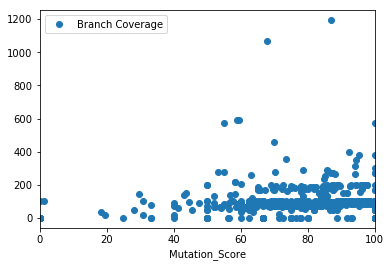

In [12]:
df.plot(x='Mutation_Score', y='Branch Coverage', style='o')

In [13]:
df[['Mutation_Score','Branch Coverage']].corr(method ='spearman')

,Mutation_Score,Branch Coverage
Mutation_Score,1.000000,0.123106
Branch Coverage,0.123106,1.000000
